# Libraries

In [1]:
!pip install colab-xterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 9.3 MB/s eta 0:00:00


In [17]:
!pip install peft

In [2]:
!pip uninstall -y torch torchvision torchaudio
!pip cache purge

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Files removed: 6


In [3]:
!pip install torch==2.4.0 --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install transformers tokenizers

In [5]:
!pip install langchain_ollama

In [6]:
!pip install langchain langchain_community unsloth[cu118] accelerate bitsandbytes transformers huggingface-hub -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of unsloth[cu118only] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of xformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.2 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of unsloth[c

#Loading Data

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Ollama

In [23]:
%load_ext colabxterm
%xterm

The colabxterm extension is already loaded. To reload it, use:
  %reload_ext colabxterm


Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
%reload_ext colabxterm

#  Classification Test (Zero-shot)

In [ ]:
from langchain_ollama import OllamaLLM
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import json
import re
import os

llm = OllamaLLM(model="llama3.1")

test_data_path = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/llm_zero_shot.json"
output_dir = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final"

with open(test_data_path, "r", encoding="utf-8") as f:
    test_data = json.load(f)

def normalize_label(text):
    text = text.strip()
    text = re.sub(r"[«»:،.\n]", "", text)
    return text.strip()

label_mapping = {
    "ورزش": "ورزشی",
    "فرهنگی": "فرهنگ",
    "سرگرمی": "تفریح و نشاط",
    "اقتصاد": "اقتصادی"
}
def fix_label(label):
    label = normalize_label(label)
    return label_mapping.get(label, label)

label_set = list(set(fix_label(sample["label"]) for sample in test_data if sample.get("label")))
print("📌 Available labels:", label_set)

prompts = {
    "prompt1": """We have a Farsi news article. Identify which of the following categories it belongs to. Respond with only the exact category name. Do not explain.

Text:
{text}

Categories: {labels}

Category:""",

    "prompt2": """Please classify the following Farsi text into one of the given categories. Return only the label.

Text:
{text}

Options: {labels}

Answer:""",

    "prompt3": """Determine the correct label for the following news content. Do not add explanation or extra text.

News:
{text}

Labels: {labels}

Label:"""
}

def run_prompt(prompt_template, prompt_name):
    predictions = []
    true_labels = []

    for sample in tqdm(test_data):
        text = f"{sample.get('title', '')}\n{sample.get('abstract', '')}\n{sample.get('body', '')}"
        true_label = fix_label(sample.get("label", ""))

        if not true_label:
            continue

        prompt = prompt_template.format(text=text, labels=", ".join(label_set))
        pred = llm.invoke(prompt)
        pred_clean = fix_label(pred)

        predictions.append(pred_clean)
        true_labels.append(true_label)

    acc = accuracy_score(true_labels, predictions)
    print("\n🔍 Accuracy:", acc)
    print("📊 Classification Report:")
    print(classification_report(true_labels, predictions, digits=4))

    for i in range(min(10, len(predictions))):
        print(f"\n🧾 Sample {i+1}")
        print("True:", true_labels[i])
        print("Pred:", predictions[i])

    # ذخیره در فایل خروجی مختص این پرامپت
    output_path = os.path.join(output_dir, f"zero_shot_{prompt_name}_results.json")
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump({
            "prompt_name": prompt_name,
            "accuracy": acc,
            "correct": sum(p == g for p, g in zip(predictions, true_labels)),
            "total": len(true_labels),
            "predictions": predictions,
            "true_labels": true_labels
        }, f, ensure_ascii=False, indent=2)

    print(f"\n✅ نتایج مربوط به {prompt_name} ذخیره شد در: {output_path}")

for name, template in prompts.items():
    print(f"\n{'='*40}\n🔁 Testing {name}...\n{'='*40}")
    run_prompt(template, name)

📌 Available labels: ['اقتصادی', 'فرهنگ', 'ورزشی', 'تفریح و نشاط']

🔁 Testing prompt1...


100%|██████████| 100/100 [02:53<00:00,  1.74s/it]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔍 Accuracy: 0.74
📊 Classification Report:
                                                                                                                                                                                                                                                                                                                                                       precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                                                                          اخبار حوادث     0.0000    0.0000    0.0000         0
                                                                                                                                                                                              

100%|██████████| 100/100 [02:39<00:00,  1.59s/it]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔍 Accuracy: 0.76
📊 Classification Report:
                                                                                                                                                                               precision    recall  f1-score   support

                                                                                                                                                                      اقتصادی     0.9600    0.9600    0.9600        25
                                                                                                                                                                        تاریخ     0.0000    0.0000    0.0000         0
                                                                                                                                                                 تفریح و نشاط     1.0000    0.4194    0.5909        31
                                                                                                

100%|██████████| 100/100 [02:49<00:00,  1.69s/it]


🔍 Accuracy: 0.67
📊 Classification Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                        precision    recall  f1-score   support

                                                                                                                                                                                                                                                                                                                                                                                                                                               culture     0.0000    0.0000    0.0000       


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Zero-shot(Accuracy)

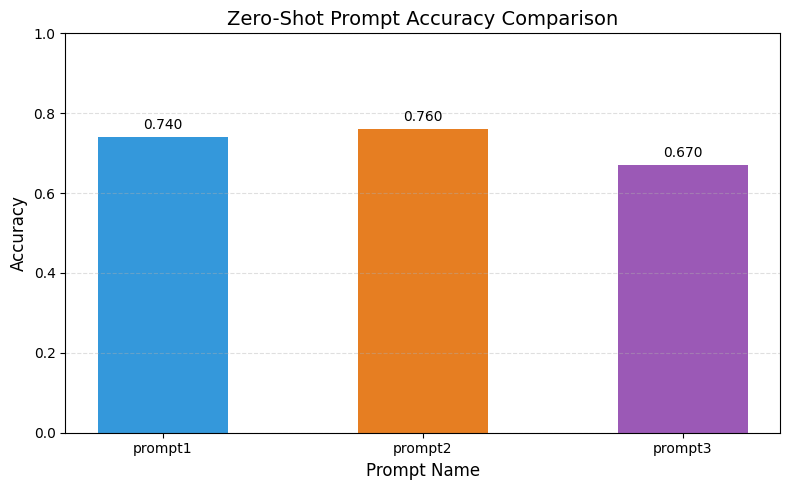

In [ ]:
import json
import os
import matplotlib.pyplot as plt

# مسیر خروجی فایل‌ها
output_dir = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final"
prompt_names = ["prompt1", "prompt2", "prompt3"]
results = {}

# بارگذاری نتایج هر پرامپت
for name in prompt_names:
    result_path = os.path.join(output_dir, f"zero_shot_{name}_results.json")
    with open(result_path, "r", encoding="utf-8") as f:
        results[name] = json.load(f)

# استخراج دقت‌ها
accuracies = [results[p]["accuracy"] for p in prompt_names]

# رسم نمودار ستونی
plt.figure(figsize=(8, 5))
colors = ['#3498db', '#e67e22', '#9b59b6']
bars = plt.bar(prompt_names, accuracies, color=colors, width=0.5)

# نمایش مقدار دقت روی هر ستون
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.02, f"{acc:.3f}",
             ha='center', fontsize=10)

plt.title("Zero-Shot Prompt Accuracy Comparison", fontsize=14)
plt.xlabel("Prompt Name", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Classification Test (Few-shot)

In [ ]:
from langchain_community.llms import Ollama
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import json
import re

llm = Ollama(model="llama3.1")

test_data_path = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/llm_few_shot.json"
with open(test_data_path, "r", encoding="utf-8") as f:
    test_data = json.load(f)

label_set = list(set(sample["label"].strip() for sample in test_data))

# Expanded few-shot examples
few_shot_examples = [
    {"text": "تیم پرسپولیس با نتیجه ۲ بر ۱ استقلال را شکست داد.", "label": "ورزشی"},
    {"text": "پیکان تهران در لیگ برتر والیبال به فینال رسید.", "label": "ورزشی"},
    {"text": "لیگ برتر فوتبال ایران امسال پر از هیجان است.", "label": "ورزشی"},

    {"text": "نرخ دلار امروز کاهش یافت و سکه افزایش قیمت داشت.", "label": "اقتصادی"},
    {"text": "تورم ماهانه در کشور برای سومین ماه متوالی افزایش یافت.", "label": "اقتصادی"},
    {"text": "بانک مرکزی تصمیم جدیدی برای کنترل نقدینگی گرفت.", "label": "اقتصادی"},

    {"text": "موزه هنرهای معاصر نمایشگاه جدیدی از آثار ایرانی افتتاح کرد.", "label": "فرهنگ"},
    {"text": "فیلم جدید اصغر فرهادی در جشنواره کن به نمایش درآمد.", "label": "فرهنگ"},
    {"text": "نمایشگاه نقاشی‌های مدرن در تهران برگزار شد.", "label": "فرهنگ"},

    {"text": "پارک آب و آتش میزبان برنامه‌های شاد تابستانی شد.", "label": "تفریح و نشاط"},
    {"text": "مسابقه بزرگ ماهیگیری خانوادگی در دریاچه چیتگر برگزار شد.", "label": "تفریح و نشاط"},
    {"text": "جشنواره موسیقی خیابانی با حضور هنرمندان جوان برگزار شد.", "label": "تفریح و نشاط"},
]

def normalize_label(text):
    text = text.strip()
    # حذف علامت‌های نگارشی و فضاهای اضافی
    text = re.sub(r"[«»:،.:\s]+", "", text)

    for label in label_set:
        if text in label.lower():
            return label

    return text.strip()

def format_few_shot_examples():
    return "\n\n".join(
        [f"Text: {ex['text']}\nCategory (in Farsi): {ex['label']}" for ex in few_shot_examples]
    )
prompts = {
    "prompt1": """You are given a Farsi news article. Based on the examples and the list of possible categories, choose the correct category with high accuracy.
Respond ONLY with the exact category name in Farsi — no explanation, no extra text, no punctuation.

Categories: {labels}

Examples:
{examples}

Text:
{text}

Category (in Farsi):""",

    "prompt2": """Classify the following Farsi news article into one of the given categories using the examples below as guidance.
If uncertain, choose the most appropriate category without guessing wildly.
Respond ONLY with the exact category name in Farsi — nothing else, no explanation or punctuation.

Categories: {labels}

Examples:
{examples}

Text:
{text}

Category (in Farsi):""",

    "prompt3": """Decide which of the given categories best matches the Farsi news article below. Use the examples for guidance.
Your response should ONLY be the category name in Farsi, with no explanations, extra text, or punctuation.

Categories: {labels}

Examples:
{examples}

Text:
{text}

Category (in Farsi):"""
}


def run_few_shot(prompts):
    results = {}
    examples_text = format_few_shot_examples()
    labels_str = ", ".join(label_set)

    for name, prompt_template in prompts.items():
        predictions = []
        true_labels = []

        print(f"\n{'='*40}\nRunning {name}\n{'='*40}")

        for sample in tqdm(test_data):
            text = sample.get("title", "") + "\n" + sample.get("abstract", "") + "\n" + sample.get("body", "")
            true_label = normalize_label(sample["label"])

            prompt = prompt_template.format(
                labels=labels_str,
                examples=examples_text,
                text=text
            )

            pred = llm.invoke(prompt, temperature=0.0)
            pred_clean = normalize_label(pred)

            predictions.append(pred_clean)
            true_labels.append(true_label)

        acc = accuracy_score(true_labels, predictions)
        print(f"\nAccuracy for {name}: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(true_labels, predictions, digits=4))

        results[name] = {
            "accuracy": acc,
            "correct": sum([p == g for p, g in zip(predictions, true_labels)]),
            "total": len(true_labels)
        }

    with open("/content/drive/MyDrive/Farsi_Sports_Dataset/Final/few_shot_prompt_results.json", "w", encoding="utf-8") as f:
        json.dump(results, f, ensure_ascii=False, indent=2)

    print("\nFew-shot accuracies saved.")
    return results

few_shot_results = run_few_shot(prompts)


Running prompt1


100%|██████████| 100/100 [02:34<00:00,  1.54s/it]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Accuracy for prompt1: 0.8100
Classification Report:
                                                                                 precision    recall  f1-score   support

                                                                        اقتصادی     0.9643    0.9310    0.9474        29
                                                                بازی‌هایویدئویی     0.0000    0.0000    0.0000         0
بنیادملیبازیهایرایانهایدرتلاشاستتاقانونجامعبازیوسرگرمیهاینوینرابهمجلسپیشنهاددهد     0.0000    0.0000    0.0000         0
                                                                     تفریحونشاط     1.0000    0.5385    0.7000        26
                                                                          فرهنگ     0.6333    0.9048    0.7451        21
                                                            قرآنوفعالیت‌هایدینی     0.0000    0.0000    0.0000         0
                                                                       هواشناسی     0.0000    0.000

100%|██████████| 100/100 [02:13<00:00,  1.33s/it]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Accuracy for prompt2: 0.7800
Classification Report:
                                                                                 precision    recall  f1-score   support

                                                                        اقتصادی     0.9310    0.9310    0.9310        29
بنیادملیبازیهایرایانهایدرتلاشاستتاقانونجامعبازیوسرگرمیهاینوینرابهمجلسپیشنهاددهد     0.0000    0.0000    0.0000         0
                                                                     تفریحونشاط     1.0000    0.5385    0.7000        26
                                                                   حماسهومقاومت     0.0000    0.0000    0.0000         0
                                                                          فرهنگ     0.6429    0.8571    0.7347        21
                                                            قرآنوفعالیت‌هایدینی     0.0000    0.0000    0.0000         0
                                                                       هواشناسی     0.0000    0.000

100%|██████████| 100/100 [02:13<00:00,  1.33s/it]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Accuracy for prompt3: 0.8100
Classification Report:
                                                                                 precision    recall  f1-score   support

                                                                        اقتصادی     0.9286    0.8966    0.9123        29
بنیادملیبازیهایرایانهایدرتلاشاستتاقانونجامعبازیوسرگرمیهاینوینرابهمجلسپیشنهاددهد     0.0000    0.0000    0.0000         0
                                                                     تفریحونشاط     1.0000    0.5769    0.7317        26
                                                                          فرهنگ     0.6333    0.9048    0.7451        21
                                                            قرآنوفعالیت‌هایدینی     0.0000    0.0000    0.0000         0
                                                                       هواشناسی     0.0000    0.0000    0.0000         0
                                                                          ورزشي     0.0000    0.000

# Few-shot (Accuracy)

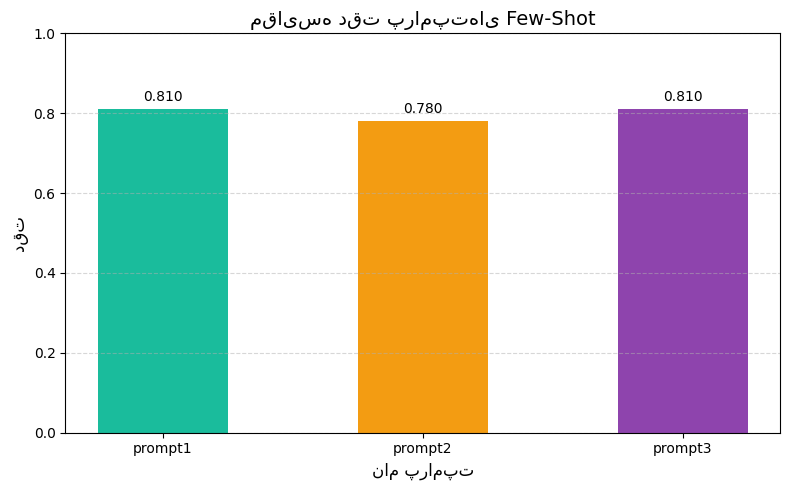

In [ ]:
import json
import matplotlib.pyplot as plt

# مسیر فایل JSON
file_path = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/few_shot_prompt_results.json"

# باز کردن و بارگذاری داده‌ها
with open(file_path, "r", encoding="utf-8") as f:
    results = json.load(f)

# استخراج اسامی پرامپت و دقت‌ها
prompt_names = list(results.keys())
accuracies = [results[p]["accuracy"] for p in prompt_names]

# رسم نمودار ستونی
plt.figure(figsize=(8, 5))
colors = ['#1abc9c', '#f39c12', '#8e44ad']
bars = plt.bar(prompt_names, accuracies, color=colors, width=0.5)

# نمایش دقت روی هر ستون
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.02, f"{acc:.3f}",
             ha='center', fontsize=10)

plt.title("مقایسه دقت پرامپت‌های Few-Shot", fontsize=14)
plt.xlabel("نام پرامپت", fontsize=12)
plt.ylabel("دقت", fontsize=12)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Zero-shot VS Few-shot

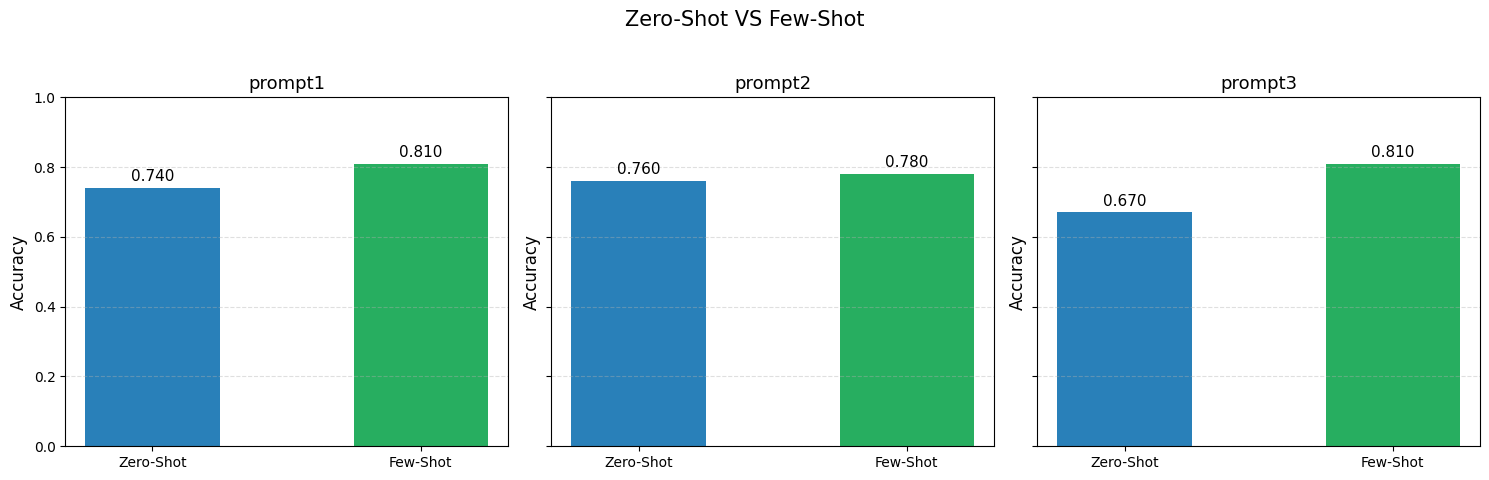

In [ ]:
import json
import matplotlib.pyplot as plt

# ======= مسیر فایل‌ها ========
zero_shot_files = {
    "prompt1": "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/zero_shot_prompt1_results.json",
    "prompt2": "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/zero_shot_prompt2_results.json",
    "prompt3": "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/zero_shot_prompt3_results.json",
}
few_shot_path = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/few_shot_prompt_results.json"

# ======= بارگذاری نتایج ========
with open(few_shot_path, "r", encoding="utf-8") as f:
    few_shot_results = json.load(f)

zero_shot_results = {}
for prompt, filepath in zero_shot_files.items():
    try:
        with open(filepath, "r", encoding="utf-8") as f:
            data = json.load(f)
            zero_shot_results[prompt] = data["accuracy"]
    except:
        print(f"⚠️ مشکل در بارگذاری {prompt}")

# ======= ترسیم نمودارها ========
prompt_names = sorted(zero_shot_files.keys())

fig, axes = plt.subplots(1, len(prompt_names), figsize=(15, 5), sharey=True)

for i, prompt in enumerate(prompt_names):
    ax = axes[i]
    zero_acc = zero_shot_results.get(prompt)
    few_acc = few_shot_results.get(prompt, {}).get("accuracy")

    if zero_acc is None or few_acc is None:
        ax.set_title(f"{prompt} (Missing Data)")
        continue

    accuracies = [zero_acc, few_acc]
    labels = ["Zero-Shot", "Few-Shot"]
    colors = ["#2980b9", "#27ae60"]

    bars = ax.bar(labels, accuracies, color=colors, width=0.5)
    ax.set_title(f"{prompt}", fontsize=13)
    ax.set_ylim(0, 1)
    ax.set_ylabel("Accuracy", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

    for bar, acc in zip(bars, accuracies):
        ax.text(bar.get_x() + bar.get_width()/2, acc + 0.02, f"{acc:.3f}",
                ha='center', fontsize=11)

plt.suptitle("Zero-Shot VS Few-Shot", fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Hard Voting + lora


🔵 Zero-shot: 100%|██████████| 100/100 [00:17<00:00,  5.62it/s]

🟢 Few-shot: 100%|██████████| 100/100 [00:19<00:00,  5.24it/s]
/tmp/ipython-input-4-3020993110.py:146: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()



📄 نمونه 1
📝 متن: عنوان: مسابقات فوتسال قهرمانی کشور برگزار شد.
خلاصه: تیم‌های برتر فوتسال به رقابت پرداختند.
متن: تیم...
🔵 Zero-shot: ورزشی
🟢 Few-shot: ورزشی
🟣 LoRA Model: تفریح و نشاط
🏁 نتیجه نهایی: ورزشی

📄 نمونه 2
📝 متن: عنوان: شاخص تورم در ماه اخیر افزایش یافت.
خلاصه: بانک مرکزی دلایل افزایش تورم را تشریح کرد.
متن: نرخ...
🔵 Zero-shot: اقتصادی
🟢 Few-shot: اقتصادی
🟣 LoRA Model: ورزشی
🏁 نتیجه نهایی: اقتصادی

📄 نمونه 3
📝 متن: عنوان: رونمایی از آلبوم موسیقی پاپ جدید.
خلاصه: آلبوم با استقبال طرفداران مواجه شد.
متن: قطعات آلبوم...
🔵 Zero-shot: فرهنگ
🟢 Few-shot: تفرح و نشاط
🟣 LoRA Model: ورزشی
🏁 نتیجه نهایی: ورزشی

📄 نمونه 4
📝 متن: عنوان: جشنواره فیلم کوتاه با حضور کارگردانان جوان برگزار شد.
خلاصه: فیلم‌های متنوع به نمایش درآمد.
م...
🔵 Zero-shot: فرهنگ
🟢 Few-shot: فرهنگ
🟣 LoRA Model: فرهنگ
🏁 نتیجه نهایی: فرهنگ

📄 نمونه 5
📝 متن: عنوان: قهرمانی تیم بسکتبال شهرداری تبریز در لیگ برتر.
خلاصه: تیم پس از سال‌ها قهرمان شد.
متن: بازی ف...
🔵 Zero-shot: ورزشی
🟢 Few-shot: ورزشی
🟣 LoRA Model: تفریح و 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


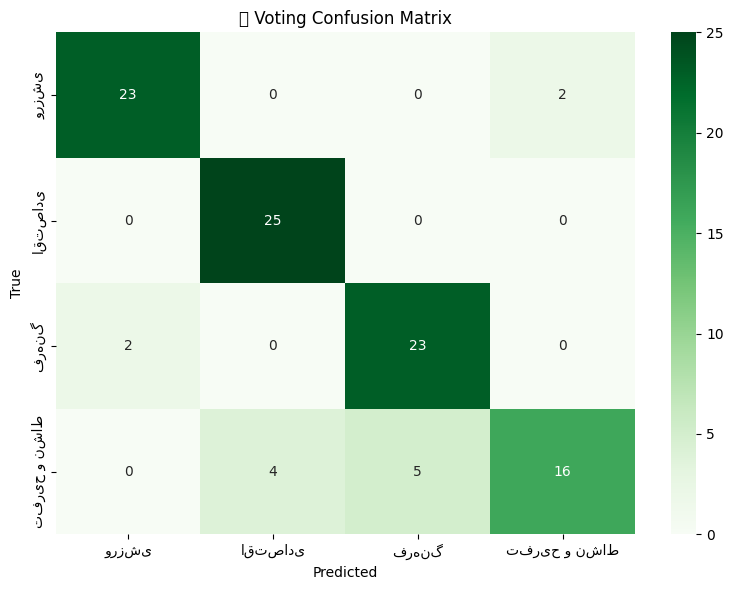

In [ ]:
import json
import re
import torch
import numpy as np
from collections import Counter
from tqdm import tqdm
from langchain_community.llms import Ollama
from transformers import AutoTokenizer, AutoModelForSequenceClassification, set_seed
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==== تنظیمات ====
set_seed(42)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/final-bert-fa-lora/best_model"
JSON_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/voting_classifier_large.json"
LABELS = ["ورزشی", "اقتصادی", "فرهنگ", "تفریح و نشاط"]
LABEL2ID = {l: i for i, l in enumerate(LABELS)}
ID2LABEL = {i: l for l, i in LABEL2ID.items()}

# ==== مدل‌ها و توکنایزر ====
llm = Ollama(model="llama3.1")

tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH).to(DEVICE)
model.eval()

# ==== پرامپت‌ها ====
zero_shot_prompt_template = """Please classify the following Farsi text into one of the given categories. Return only the label.
Text:
{text}

Categories: {labels}

Category:"""

few_shot_examples = [
    {"text": "تیم پرسپولیس با نتیجه ۲ بر ۱ استقلال را شکست داد.", "label": "ورزشی"},
    {"text": "نرخ دلار امروز کاهش یافت و سکه افزایش قیمت داشت.", "label": "اقتصادی"},
    {"text": "فیلم جدید اصغر فرهادی در جشنواره کن به نمایش درآمد.", "label": "فرهنگ"},
    {"text": "جشنواره موسیقی خیابانی با حضور هنرمندان جوان برگزار شد.", "label": "تفریح و نشاط"},
]

few_shot_examples_text = "\n\n".join(
    f"Text: {ex['text']}\nCategory (in Farsi): {ex['label']}" for ex in few_shot_examples
)

few_shot_prompt_template = """You are given a Farsi news article. Based on the examples and the list of possible categories, choose the correct category.
Respond ONLY with the exact category name in Farsi — no explanation.

Categories: {labels}

Examples:
{examples}

Text:
{text}

Category (in Farsi):"""

# ==== توابع بهینه شده ====
def normalize(text):
    return re.sub(r"[«»:،.\s]+", " ", text).strip()

def predict_zero(text):
    prompt = zero_shot_prompt_template.format(text=text, labels=", ".join(LABELS))
    return normalize(llm.invoke(prompt))

def predict_few(text):
    prompt = few_shot_prompt_template.format(
        text=text, labels=", ".join(LABELS), examples=few_shot_examples_text
    )
    return normalize(llm.invoke(prompt))

def predict_lora(texts):
    tokens = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt").to(DEVICE)
    with torch.no_grad():
        outputs = model(**tokens)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
    return [ID2LABEL[p] for p in preds]

def vote(labels):
    counts = Counter(labels)
    top_count = max(counts.values())
    top_labels = [label for label, count in counts.items() if count == top_count]

    if len(top_labels) == 1:
        return top_labels[0]
    else:
        # LoRA > Few > Zero
        priorities = [labels[2], labels[1], labels[0]]  # LoRA > Few > Zero
        for label in priorities:
            if label in top_labels:
                return label

# ==== بارگذاری داده ====
with open(JSON_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

texts = [item["text"] for item in data]
true_labels = [normalize(item["label"]) for item in data]

# ==== پیش‌بینی‌ها ====
pred_zero = [predict_zero(t) for t in tqdm(texts, desc="🔵 Zero-shot")]
pred_few = [predict_few(t) for t in tqdm(texts, desc="🟢 Few-shot")]
pred_lora = predict_lora(texts)

# ==== Voting و چاپ نتایج در حین پردازش ====
final_preds = []

for i, (text, z, f, l) in enumerate(zip(texts, pred_zero, pred_few, pred_lora)):
    final = vote([z, f, l])

    print(f"\n📄 نمونه {i+1}")
    print(f"📝 متن: {text[:100]}...")  # فقط 100 کاراکتر اول برای خوانایی
    print(f"🔵 Zero-shot: {z}")
    print(f"🟢 Few-shot: {f}")
    print(f"🟣 LoRA Model: {l}")
    print(f"🏁 نتیجه نهایی: {final}")

    data[i]["pred_zero"] = z
    data[i]["pred_few"] = f
    data[i]["pred_lora"] = l
    data[i]["predicted_label"] = final
    final_preds.append(final)

# ==== ذخیره نتایج ====
with open(JSON_PATH, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

# ==== ارزیابی ====
print("\n📊 گزارش نهایی:")
print(classification_report(true_labels, final_preds, target_names=LABELS))
acc = accuracy_score(true_labels, final_preds)
print(f"🎯 دقت Voting Classifier: {acc:.4f}")

# ==== Confusion Matrix ====
cm = confusion_matrix(true_labels, final_preds, labels=LABELS)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=LABELS, yticklabels=LABELS, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("🧠 Voting Confusion Matrix")
plt.tight_layout()
plt.show()

# Soft Voting

در حال اجرای Zero-shot ...



100%|██████████| 300/300 [02:16<00:00,  2.19it/s]


در حال اجرای Few-shot ...



100%|██████████| 300/300 [02:16<00:00,  2.20it/s]


در حال اجرای LoRA ...

📄 نمونه 1
📝 متن: ترکیب الوحده مقابل پرسپولیس ترکیب تیم فوتبال الوحده امارات دیدار پرسپولیس ایران گزارش خبرنگار ورزشی ...
🔵 Zero-shot: ورزشی
🟢 Few-shot: ورزشی
🟣 LoRA Top-1: تفریح و نشاط
🏁 نتیجه نهایی (Soft Voting): ورزشی

📄 نمونه 2
📝 متن: تردد روان جاده‌های کشور کاهش درصدی ترافیک محورهای شهری معاون مرکز مدیریت راه‌ها تردد ثبت‌شده شبانه‌ر...
🔵 Zero-shot: اقتصادی
🟢 Few-shot: اقتصادی
🟣 LoRA Top-1: ورزشی
🏁 نتیجه نهایی (Soft Voting): اقتصادی

📄 نمونه 3
📝 متن: ۷۰ درصدی پرفروش‌ترین محصول نفت ایرانول مرداد ماه صعودی درآمدهای شرکت ایرانول انتشار گزارش ماهانه مرد...
🔵 Zero-shot: اقتصادی
🟢 Few-shot: اقتصادی
🟣 LoRA Top-1: ورزشی
🏁 نتیجه نهایی (Soft Voting): اقتصادی

📄 نمونه 4
📝 متن: اطلاعیه بنیاد شهید آزمون استخدامی فرزندان شهدا جانبازان درصد اداره اشتغال کارآفرینی بنیاد شهید امور ...
🔵 Zero-shot: فرهنگ
🟢 Few-shot: اقتصادی
🟣 LoRA Top-1: فرهنگ
🏁 نتیجه نهایی (Soft Voting): فرهنگ

📄 نمونه 5
📝 متن: کنکوری طعم خون گفتند داعش حمله بانوان بکشید فیلم دوران نوجوانی‌اش مصادف محاصره شهر 

/tmp/ipython-input-9-1519481568.py:155: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


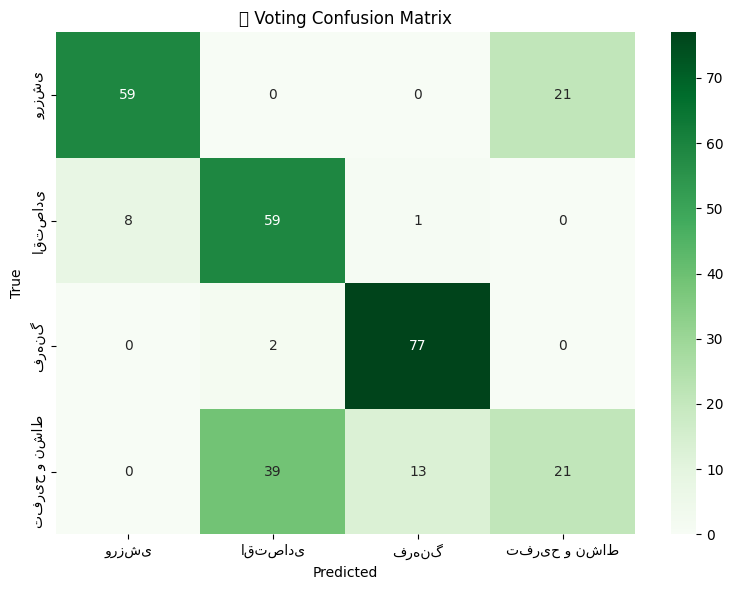

In [9]:
import json
import re
import torch
import numpy as np
from collections import Counter
from tqdm import tqdm
from langchain_community.llms import Ollama
from transformers import AutoTokenizer, AutoModelForSequenceClassification, set_seed
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==== تنظیمات ====
set_seed(42)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/final-bert-fa-lora/best_model"
JSON_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/lora_train.json"
LABELS = ["ورزشی", "اقتصادی", "فرهنگ", "تفریح و نشاط"]
LABEL2ID = {l: i for i, l in enumerate(LABELS)}
ID2LABEL = {i: l for l, i in LABEL2ID.items()}

# ==== مدل‌ها و توکنایزر ====
llm = Ollama(model="llama3.1")

tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH).to(DEVICE)
model.eval()

# ==== پرامپت‌ها ====
zero_shot_prompt_template = """Please classify the following Farsi text into one of the given categories. Return only the label.
Text:
{text}

Categories: {labels}

Category:"""

few_shot_examples = [
    {"text": "تیم پرسپولیس با نتیجه ۲ بر ۱ استقلال را شکست داد.", "label": "ورزشی"},
    {"text": "نرخ دلار امروز کاهش یافت و سکه افزایش قیمت داشت.", "label": "اقتصادی"},
    {"text": "فیلم جدید اصغر فرهادی در جشنواره کن به نمایش درآمد.", "label": "فرهنگ"},
    {"text": "جشنواره موسیقی خیابانی با حضور هنرمندان جوان برگزار شد.", "label": "تفریح و نشاط"},
]

few_shot_examples_text = "\n\n".join(
    f"Text: {ex['text']}\nCategory (in Farsi): {ex['label']}" for ex in few_shot_examples
)

few_shot_prompt_template = """You are given a Farsi news article. Based on the examples and the list of possible categories, choose the correct category.
Respond ONLY with the exact category name in Farsi — no explanation.

Categories: {labels}

Examples:
{examples}

Text:
{text}

Category (in Farsi):"""

# ==== توابع کمکی ====
def normalize(text):
    return re.sub(r"[«»:،.\s]+", " ", text).strip()

def predict_zero(text):
    prompt = zero_shot_prompt_template.format(text=text, labels=", ".join(LABELS))
    return normalize(llm.invoke(prompt))

def predict_few(text):
    prompt = few_shot_prompt_template.format(
        text=text, labels=", ".join(LABELS), examples=few_shot_examples_text
    )
    return normalize(llm.invoke(prompt))

def predict_lora(texts):
    tokens = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt").to(DEVICE)
    with torch.no_grad():
        outputs = model(**tokens)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
    return [ID2LABEL[p] for p in preds], logits.cpu().numpy()

def soft_voting(lora_logits, few_label, zero_label, weights=(0.4, 0.35, 0.25)):
    lora_probs = torch.softmax(torch.tensor(lora_logits), dim=0).numpy()
    votes = np.zeros(len(LABELS))

    # وزن‌دهی LoRA
    votes += lora_probs * weights[0]

    # وزن‌دهی Few-shot
    if few_label in LABEL2ID:
        votes[LABEL2ID[few_label]] += weights[1]

    # وزن‌دهی Zero-shot
    if zero_label in LABEL2ID:
        votes[LABEL2ID[zero_label]] += weights[2]

    final_index = np.argmax(votes)
    return ID2LABEL[final_index]

# ==== بارگذاری داده ====
with open(JSON_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

texts = [item["text"] for item in data]
true_labels = [normalize(item["label"]) for item in data]

# ==== پیش‌بینی‌ها ====
print("در حال اجرای Zero-shot ...")
pred_zero = [predict_zero(t) for t in tqdm(texts)]

print("در حال اجرای Few-shot ...")
pred_few = [predict_few(t) for t in tqdm(texts)]

print("در حال اجرای LoRA ...")
pred_lora, lora_logits_batch = predict_lora(texts)

# ==== پیش‌بینی نهایی با Soft Voting ====
final_preds = []

for i, (text, z, f, l_logits) in enumerate(zip(texts, pred_zero, pred_few, lora_logits_batch)):
    final = soft_voting(l_logits, f, z)

    print(f"\n📄 نمونه {i+1}")
    print(f"📝 متن: {text[:100]}...")
    print(f"🔵 Zero-shot: {z}")
    print(f"🟢 Few-shot: {f}")
    print(f"🟣 LoRA Top-1: {ID2LABEL[np.argmax(l_logits)]}")
    print(f"🏁 نتیجه نهایی (Soft Voting): {final}")

    data[i]["pred_zero"] = z
    data[i]["pred_few"] = f
    data[i]["pred_lora_top1"] = ID2LABEL[np.argmax(l_logits)]
    data[i]["predicted_label"] = final
    final_preds.append(final)

# ==== ذخیره نتایج ====
with open(JSON_PATH, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

# ==== ارزیابی ====
print("\n📊 گزارش نهایی:")
print(classification_report(true_labels, final_preds, target_names=LABELS))
acc = accuracy_score(true_labels, final_preds)
print(f"🎯 دقت Voting Classifier: {acc:.4f}")

# ==== Confusion Matrix ====
cm = confusion_matrix(true_labels, final_preds, labels=LABELS)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=LABELS, yticklabels=LABELS, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("🧠 Voting Confusion Matrix")
plt.tight_layout()
plt.show()

در حال اجرای Zero-shot ...




  0%|          | 0/368 [00:00<?, ?it/s]

  0%|          | 1/368 [00:03<19:41,  3.22s/it]

  1%|          | 2/368 [00:03<10:30,  1.72s/it]

  1%|          | 3/368 [00:04<07:16,  1.19s/it]

  1%|          | 4/368 [00:04<05:08,  1.18it/s]

  1%|▏         | 5/368 [00:05<05:12,  1.16it/s]

  2%|▏         | 6/368 [00:05<04:02,  1.49it/s]

  2%|▏         | 7/368 [00:06<04:28,  1.35it/s]

  2%|▏         | 8/368 [00:07<04:54,  1.22it/s]

  2%|▏         | 9/368 [00:08<05:00,  1.19it/s]

  3%|▎         | 10/368 [00:09<04:26,  1.34it/s]

  3%|▎         | 11/368 [00:10<04:45,  1.25it/s]

  3%|▎         | 12/368 [00:10<03:52,  1.53it/s]

  4%|▎         | 13/368 [00:10<03:17,  1.79it/s]

  4%|▍         | 14/368 [00:11<03:16,  1.80it/s]

  4%|▍         | 15/368 [00:11<02:34,  2.28it/s]

  4%|▍         | 16/368 [00:11<02:15,  2.59it/s]

  5%|▍         | 17/368 [00:12<02:01,  2.88it/s]

  5%|▍         | 18/368 [00:12<01:56,  3.01it/s]

  5%|▌         | 19/368 [00:12<01:45,  3.31it/s]

  5%|▌         |

در حال اجرای Few-shot ...




  0%|          | 0/368 [00:00<?, ?it/s]

  0%|          | 1/368 [00:00<02:46,  2.20it/s]

  1%|          | 2/368 [00:01<03:38,  1.68it/s]

  1%|          | 3/368 [00:01<03:35,  1.69it/s]

  1%|          | 4/368 [00:02<02:48,  2.16it/s]

  1%|▏         | 5/368 [00:02<03:45,  1.61it/s]

  2%|▏         | 6/368 [00:03<03:08,  1.92it/s]

  2%|▏         | 7/368 [00:04<03:54,  1.54it/s]

  2%|▏         | 8/368 [00:05<04:33,  1.32it/s]

  2%|▏         | 9/368 [00:06<04:49,  1.24it/s]

  3%|▎         | 10/368 [00:06<04:20,  1.37it/s]

  3%|▎         | 11/368 [00:07<04:43,  1.26it/s]

  3%|▎         | 12/368 [00:07<03:53,  1.53it/s]

  4%|▎         | 13/368 [00:08<03:18,  1.79it/s]

  4%|▍         | 14/368 [00:08<03:17,  1.79it/s]

  4%|▍         | 15/368 [00:08<02:35,  2.27it/s]

  4%|▍         | 16/368 [00:09<02:17,  2.56it/s]

  5%|▍         | 17/368 [00:09<02:01,  2.89it/s]

  5%|▍         | 18/368 [00:09<01:58,  2.96it/s]

  5%|▌         | 19/368 [00:10<01:49,  3.17it/s]

  5%|▌         |

در حال اجرای LoRA ...

📄 نمونه 1
📝 متن: عنوان: گزارش الوطن بحرین از اهمیت دیدار با تیم ملی ایران
خلاصه: الوطن در گزارشی از اهمیت دیدار بحرین...
🔵 Zero-shot: ورزشی
🟢 Few-shot: اقتصادی
🟣 LoRA Top-1: تفریح و نشاط
🏁 نتیجه نهایی (Soft Voting): تفریح و نشاط

📄 نمونه 2
📝 متن: عنوان: کفاشیان: هرکسی توانایی اداره فوتبال را دارد در انتخابات شرکت کند/ فیفا از سال 86 مخالف حضور ن...
🔵 Zero-shot: ورزشی
🟢 Few-shot: ورزشی
🟣 LoRA Top-1: تفریح و نشاط
🏁 نتیجه نهایی (Soft Voting): ورزشی

📄 نمونه 3
📝 متن: عنوان: ویژگی های ورق آهن خوب چیست؟
خلاصه: آیا می دانید ویژگی های یک ورق آهن خوب چیست ؟ در ابتدا برای...
🔵 Zero-shot: اقتصادی
🟢 Few-shot: اقتصادی
🟣 LoRA Top-1: ورزشی
🏁 نتیجه نهایی (Soft Voting): اقتصادی

📄 نمونه 4
📝 متن: عنوان: اعلام داوران ۵ بازی از هفته بیست و هفتم لیگ برتر/قضاوت منصوریان و عرب براقی برای سرخابی‌ها
خل...
🔵 Zero-shot: ورزشی
🟢 Few-shot: ورزشی
🟣 LoRA Top-1: تفریح و نشاط
🏁 نتیجه نهایی (Soft Voting): ورزشی

📄 نمونه 5
📝 متن: عنوان: جشنواره نوروزی کارگزاری آگاه آغاز شد
خلاصه: کارگزاری آگاه به 

/tmp/ipython-input-15-3119575141.py:155: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


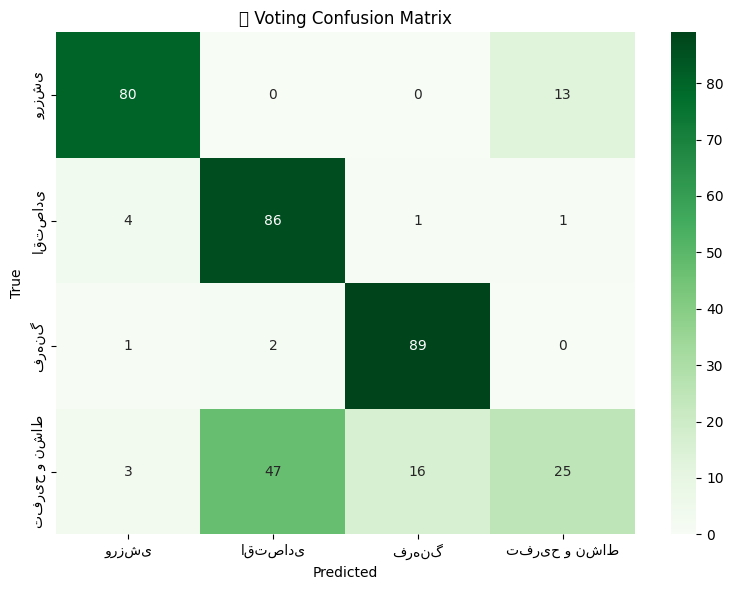

In [15]:
import json
import re
import torch
import numpy as np
from collections import Counter
from tqdm import tqdm
from langchain_community.llms import Ollama
from transformers import AutoTokenizer, AutoModelForSequenceClassification, set_seed
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==== تنظیمات ====
set_seed(42)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/final-bert-fa-lora/best_model"
JSON_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/lora_val.json"
LABELS = ["ورزشی", "اقتصادی", "فرهنگ", "تفریح و نشاط"]
LABEL2ID = {l: i for i, l in enumerate(LABELS)}
ID2LABEL = {i: l for l, i in LABEL2ID.items()}

# ==== مدل‌ها و توکنایزر ====
llm = Ollama(model="llama3.1")

tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH).to(DEVICE)
model.eval()

# ==== پرامپت‌ها ====
zero_shot_prompt_template = """Please classify the following Farsi text into one of the given categories. Return only the label.
Text:
{text}

Categories: {labels}

Category:"""

few_shot_examples = [
    {"text": "تیم پرسپولیس با نتیجه ۲ بر ۱ استقلال را شکست داد.", "label": "ورزشی"},
    {"text": "نرخ دلار امروز کاهش یافت و سکه افزایش قیمت داشت.", "label": "اقتصادی"},
    {"text": "فیلم جدید اصغر فرهادی در جشنواره کن به نمایش درآمد.", "label": "فرهنگ"},
    {"text": "جشنواره موسیقی خیابانی با حضور هنرمندان جوان برگزار شد.", "label": "تفریح و نشاط"},
]

few_shot_examples_text = "\n\n".join(
    f"Text: {ex['text']}\nCategory (in Farsi): {ex['label']}" for ex in few_shot_examples
)

few_shot_prompt_template = """You are given a Farsi news article. Based on the examples and the list of possible categories, choose the correct category.
Respond ONLY with the exact category name in Farsi — no explanation.

Categories: {labels}

Examples:
{examples}

Text:
{text}

Category (in Farsi):"""

# ==== توابع کمکی ====
def normalize(text):
    return re.sub(r"[«»:،.\s]+", " ", text).strip()

def predict_zero(text):
    prompt = zero_shot_prompt_template.format(text=text, labels=", ".join(LABELS))
    return normalize(llm.invoke(prompt))

def predict_few(text):
    prompt = few_shot_prompt_template.format(
        text=text, labels=", ".join(LABELS), examples=few_shot_examples_text
    )
    return normalize(llm.invoke(prompt))

def predict_lora(texts):
    tokens = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt").to(DEVICE)
    with torch.no_grad():
        outputs = model(**tokens)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
    return [ID2LABEL[p] for p in preds], logits.cpu().numpy()

def soft_voting(lora_logits, few_label, zero_label, weights=(0.4, 0.35, 0.25)):
    lora_probs = torch.softmax(torch.tensor(lora_logits), dim=0).numpy()
    votes = np.zeros(len(LABELS))

    # وزن‌دهی LoRA
    votes += lora_probs * weights[0]

    # وزن‌دهی Few-shot
    if few_label in LABEL2ID:
        votes[LABEL2ID[few_label]] += weights[1]

    # وزن‌دهی Zero-shot
    if zero_label in LABEL2ID:
        votes[LABEL2ID[zero_label]] += weights[2]

    final_index = np.argmax(votes)
    return ID2LABEL[final_index]

# ==== بارگذاری داده ====
with open(JSON_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

texts = [item["text"] for item in data]
true_labels = [normalize(item["label"]) for item in data]

# ==== پیش‌بینی‌ها ====
print("در حال اجرای Zero-shot ...")
pred_zero = [predict_zero(t) for t in tqdm(texts)]

print("در حال اجرای Few-shot ...")
pred_few = [predict_few(t) for t in tqdm(texts)]

print("در حال اجرای LoRA ...")
pred_lora, lora_logits_batch = predict_lora(texts)

# ==== پیش‌بینی نهایی با Soft Voting ====
final_preds = []

for i, (text, z, f, l_logits) in enumerate(zip(texts, pred_zero, pred_few, lora_logits_batch)):
    final = soft_voting(l_logits, f, z)

    print(f"\n📄 نمونه {i+1}")
    print(f"📝 متن: {text[:100]}...")
    print(f"🔵 Zero-shot: {z}")
    print(f"🟢 Few-shot: {f}")
    print(f"🟣 LoRA Top-1: {ID2LABEL[np.argmax(l_logits)]}")
    print(f"🏁 نتیجه نهایی (Soft Voting): {final}")

    data[i]["pred_zero"] = z
    data[i]["pred_few"] = f
    data[i]["pred_lora_top1"] = ID2LABEL[np.argmax(l_logits)]
    data[i]["predicted_label"] = final
    final_preds.append(final)

# ==== ذخیره نتایج ====
with open(JSON_PATH, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

# ==== ارزیابی ====
print("\n📊 گزارش نهایی:")
print(classification_report(true_labels, final_preds, target_names=LABELS))
acc = accuracy_score(true_labels, final_preds)
print(f"🎯 دقت Voting Classifier: {acc:.4f}")

# ==== Confusion Matrix ====
cm = confusion_matrix(true_labels, final_preds, labels=LABELS)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=LABELS, yticklabels=LABELS, cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("🧠 Voting Confusion Matrix")
plt.tight_layout()
plt.show()

# weighted Voting

در حال اجرای Zero-shot ...




  0%|          | 0/368 [00:00<?, ?it/s]

  0%|          | 1/368 [00:00<02:37,  2.32it/s]

  1%|          | 2/368 [00:01<03:32,  1.72it/s]

  1%|          | 3/368 [00:01<03:33,  1.71it/s]

  1%|          | 4/368 [00:02<02:54,  2.08it/s]

  1%|▏         | 5/368 [00:02<03:48,  1.59it/s]

  2%|▏         | 6/368 [00:03<03:06,  1.94it/s]

  2%|▏         | 7/368 [00:04<03:51,  1.56it/s]

  2%|▏         | 8/368 [00:05<04:29,  1.34it/s]

  2%|▏         | 9/368 [00:05<04:44,  1.26it/s]

  3%|▎         | 10/368 [00:06<04:15,  1.40it/s]

  3%|▎         | 11/368 [00:07<04:38,  1.28it/s]

  3%|▎         | 12/368 [00:07<03:47,  1.57it/s]

  4%|▎         | 13/368 [00:08<03:14,  1.83it/s]

  4%|▍         | 14/368 [00:08<03:13,  1.83it/s]

  4%|▍         | 15/368 [00:08<02:32,  2.31it/s]

  4%|▍         | 16/368 [00:09<02:14,  2.62it/s]

  5%|▍         | 17/368 [00:09<01:58,  2.95it/s]

  5%|▍         | 18/368 [00:09<01:54,  3.07it/s]

  5%|▌         | 19/368 [00:09<01:46,  3.29it/s]

  5%|▌         |

در حال اجرای Few-shot ...




  0%|          | 0/368 [00:00<?, ?it/s]

  0%|          | 1/368 [00:00<02:58,  2.06it/s]

  1%|          | 2/368 [00:01<03:43,  1.64it/s]

  1%|          | 3/368 [00:01<03:38,  1.67it/s]

  1%|          | 4/368 [00:02<02:51,  2.13it/s]

  1%|▏         | 5/368 [00:02<03:47,  1.60it/s]

  2%|▏         | 6/368 [00:03<03:21,  1.79it/s]

  2%|▏         | 7/368 [00:04<04:03,  1.48it/s]

  2%|▏         | 8/368 [00:05<04:39,  1.29it/s]

  2%|▏         | 9/368 [00:06<04:54,  1.22it/s]

  3%|▎         | 10/368 [00:06<04:23,  1.36it/s]

  3%|▎         | 11/368 [00:07<04:44,  1.25it/s]

  3%|▎         | 12/368 [00:08<03:52,  1.53it/s]

  4%|▎         | 13/368 [00:08<03:13,  1.83it/s]

  4%|▍         | 14/368 [00:08<03:14,  1.82it/s]

  4%|▍         | 15/368 [00:09<02:33,  2.31it/s]

  4%|▍         | 16/368 [00:09<02:17,  2.56it/s]

  5%|▍         | 17/368 [00:09<02:02,  2.88it/s]

  5%|▍         | 18/368 [00:09<01:57,  2.97it/s]

  5%|▌         | 19/368 [00:10<01:49,  3.19it/s]

  5%|▌         |

در حال اجرای LoRA ...

🔍 در حال تست وزن‌های مختلف...

🎯 وزن‌ها (0.6, 0.3, 0.1) → دقت: 0.2473
🎯 وزن‌ها (0.5, 0.3, 0.2) → دقت: 0.7663
🎯 وزن‌ها (0.4, 0.4, 0.2) → دقت: 0.7908
🎯 وزن‌ها (0.7, 0.2, 0.1) → دقت: 0.2473
🎯 وزن‌ها (0.8, 0.1, 0.1) → دقت: 0.2473
🎯 وزن‌ها (0.5, 0.4, 0.1) → دقت: 0.7663

✅ بهترین وزن‌ها: (0.4, 0.4, 0.2) → دقت نهایی: 0.7908

              precision    recall  f1-score   support

       ورزشی       0.72      0.93      0.81        92
     اقتصادی       0.77      0.44      0.56        91
       فرهنگ       0.79      0.91      0.85        92
تفریح و نشاط       0.90      0.87      0.89        93

    accuracy                           0.79       368
   macro avg       0.79      0.79      0.78       368
weighted avg       0.79      0.79      0.78       368



/tmp/ipython-input-16-2977034708.py:148: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


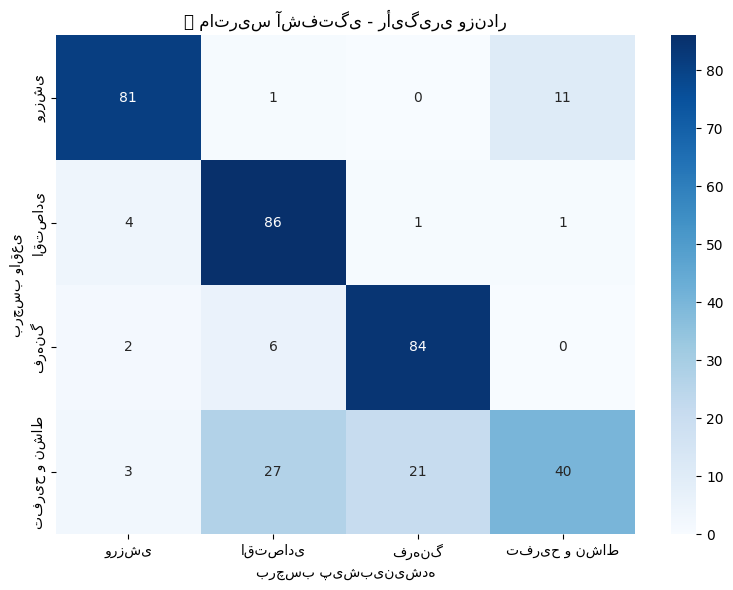

In [16]:
import json
import re
import torch
import numpy as np
from tqdm import tqdm
from langchain_community.llms import Ollama
from transformers import AutoTokenizer, AutoModelForSequenceClassification, set_seed
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==== تنظیمات ====
set_seed(42)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/final-bert-fa-lora/best_model"
JSON_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/lora_val.json"
LABELS = ["ورزشی", "اقتصادی", "فرهنگ", "تفریح و نشاط"]
LABEL2ID = {l: i for i, l in enumerate(LABELS)}
ID2LABEL = {i: l for l, i in LABEL2ID.items()}

# ==== مدل‌ها و توکنایزر ====
llm = Ollama(model="llama3.1")
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH).to(DEVICE)
model.eval()

# ==== پرامپت‌ها ====
zero_shot_prompt_template = """Please classify the following Farsi text into one of the given categories. Return only the label.
Text:
{text}

Categories: {labels}

Category:"""

few_shot_examples = [
    {"text": "تیم پرسپولیس با نتیجه ۲ بر ۱ استقلال را شکست داد.", "label": "ورزشی"},
    {"text": "نرخ دلار امروز کاهش یافت و سکه افزایش قیمت داشت.", "label": "اقتصادی"},
    {"text": "فیلم جدید اصغر فرهادی در جشنواره کن به نمایش درآمد.", "label": "فرهنگ"},
    {"text": "جشنواره موسیقی خیابانی با حضور هنرمندان جوان برگزار شد.", "label": "تفریح و نشاط"},
]

few_shot_examples_text = "\n\n".join(
    f"Text: {ex['text']}\nCategory (in Farsi): {ex['label']}" for ex in few_shot_examples
)

few_shot_prompt_template = """You are given a Farsi news article. Based on the examples and the list of possible categories, choose the correct category.
Respond ONLY with the exact category name in Farsi — no explanation.

Categories: {labels}

Examples:
{examples}

Text:
{text}

Category (in Farsi):"""

# ==== توابع کمکی ====
def normalize(text):
    return re.sub(r"[«»:،.\s]+", " ", text).strip()

def predict_zero(text):
    prompt = zero_shot_prompt_template.format(text=text, labels=", ".join(LABELS))
    return normalize(llm.invoke(prompt))

def predict_few(text):
    prompt = few_shot_prompt_template.format(
        text=text, labels=", ".join(LABELS), examples=few_shot_examples_text
    )
    return normalize(llm.invoke(prompt))

def predict_lora(texts):
    tokens = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt").to(DEVICE)
    with torch.no_grad():
        outputs = model(**tokens)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
    return [ID2LABEL[p] for p in preds], logits.cpu().numpy()

def weighted_soft_voting(zero_label, few_label, lora_logits, weights):
    lora_probs = torch.softmax(torch.tensor(lora_logits), dim=0).numpy()
    votes = np.zeros(len(LABELS))
    votes += lora_probs * weights[0]
    if few_label in LABEL2ID:
        votes[LABEL2ID[few_label]] += weights[1]
    if zero_label in LABEL2ID:
        votes[LABEL2ID[zero_label]] += weights[2]
    return ID2LABEL[np.argmax(votes)]

# ==== بارگذاری داده ====
with open(JSON_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

texts = [item["text"] for item in data]
true_labels = [normalize(item["label"]) for item in data]

# ==== اجرای مدل‌ها فقط یک‌بار ====
print("در حال اجرای Zero-shot ...")
pred_zero = [predict_zero(t) for t in tqdm(texts)]

print("در حال اجرای Few-shot ...")
pred_few = [predict_few(t) for t in tqdm(texts)]

print("در حال اجرای LoRA ...")
pred_lora, lora_logits_batch = predict_lora(texts)

# ==== جستجوی بهترین وزن‌ها ====
candidate_weights = [
    (0.6, 0.3, 0.1),
    (0.5, 0.3, 0.2),
    (0.4, 0.4, 0.2),
    (0.7, 0.2, 0.1),
    (0.8, 0.1, 0.1),
    (0.5, 0.4, 0.1),
]

best_acc = 0
best_weights = None
best_preds = []

print("\n🔍 در حال تست وزن‌های مختلف...\n")
for w in candidate_weights:
    preds = []
    for z, f, l in zip(pred_zero, pred_few, lora_logits_batch):
        preds.append(weighted_soft_voting(z, f, l, w))

    acc = accuracy_score(true_labels, preds)
    print(f"🎯 وزن‌ها {w} → دقت: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_weights = w
        best_preds = preds

# ==== چاپ نتایج نهایی ====
print(f"\n✅ بهترین وزن‌ها: {best_weights} → دقت نهایی: {best_acc:.4f}\n")
print(classification_report(true_labels, best_preds, target_names=LABELS))

# ==== ماتریس آشفتگی ====
cm = confusion_matrix(true_labels, best_preds, labels=LABELS)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=LABELS, yticklabels=LABELS, cmap="Blues")
plt.xlabel("برچسب پیش‌بینی‌شده")
plt.ylabel("برچسب واقعی")
plt.title("🧠 ماتریس آشفتگی - رأی‌گیری وزن‌دار")
plt.tight_layout()
plt.show()

In [21]:
import json
import re
import torch
import numpy as np
from tqdm import tqdm
from langchain_community.llms import Ollama
from transformers import AutoTokenizer, AutoModelForSequenceClassification, set_seed
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==== تنظیمات ====
set_seed(42)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/final-bert-fa-lora/best_model"
JSON_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/lora_val.json"
LABELS = ["ورزشی", "اقتصادی", "فرهنگ", "تفریح و نشاط"]
LABEL2ID = {l: i for i, l in enumerate(LABELS)}
ID2LABEL = {i: l for l, i in LABEL2ID.items()}

# ==== مدل‌ها و توکنایزر ====
llm = Ollama(model="llama3.1")
tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH).to(DEVICE)
model.eval()

# ==== پرامپت‌ها ====
zero_shot_prompt_template = """Please classify the following Farsi text into one of the given categories. Return only the label.
Text:
{text}

Categories: {labels}

Category:"""

few_shot_examples = [
    {"text": "تیم پرسپولیس با نتیجه ۲ بر ۱ استقلال را شکست داد.", "label": "ورزشی"},
    {"text": "نرخ دلار امروز کاهش یافت و سکه افزایش قیمت داشت.", "label": "اقتصادی"},
    {"text": "فیلم جدید اصغر فرهادی در جشنواره کن به نمایش درآمد.", "label": "فرهنگ"},
    {"text": "جشنواره موسیقی خیابانی با حضور هنرمندان جوان برگزار شد.", "label": "تفریح و نشاط"},
]

few_shot_examples_text = "\n\n".join(
    f"Text: {ex['text']}\nCategory (in Farsi): {ex['label']}" for ex in few_shot_examples
)

few_shot_prompt_template = """You are given a Farsi news article. Based on the examples and the list of possible categories, choose the correct category.
Respond ONLY with the exact category name in Farsi — no explanation.

Categories: {labels}

Examples:
{examples}

Text:
{text}

Category (in Farsi):"""

# ==== توابع کمکی ====
def normalize(text):
    return re.sub(r"[«»:،.\s]+", " ", text).strip()

def predict_zero(text):
    prompt = zero_shot_prompt_template.format(text=text, labels=", ".join(LABELS))
    return normalize(llm.invoke(prompt))

def predict_few(text):
    prompt = few_shot_prompt_template.format(
        text=text, labels=", ".join(LABELS), examples=few_shot_examples_text
    )
    return normalize(llm.invoke(prompt))

def predict_lora(texts):
    tokens = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt").to(DEVICE)
    with torch.no_grad():
        outputs = model(**tokens)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
    return [ID2LABEL[p] for p in preds], logits.cpu().numpy()

def weighted_soft_voting(zero_label, few_label, lora_logits, weights):
    lora_probs = torch.softmax(torch.tensor(lora_logits), dim=0).numpy()
    votes = np.zeros(len(LABELS))
    votes += lora_probs * weights[0]
    if few_label in LABEL2ID:
        votes[LABEL2ID[few_label]] += weights[1]
    if zero_label in LABEL2ID:
        votes[LABEL2ID[zero_label]] += weights[2]
    return ID2LABEL[np.argmax(votes)]

# ==== بارگذاری داده ====
with open(JSON_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

texts = [item["text"] for item in data]
true_labels = [normalize(item["label"]) for item in data]

# ==== اجرای مدل‌ها فقط یک‌بار ====
print("در حال اجرای Zero-shot ...")
pred_zero = [predict_zero(t) for t in tqdm(texts)]

print("در حال اجرای Few-shot ...")
pred_few = [predict_few(t) for t in tqdm(texts)]

print("در حال اجرای LoRA ...")
pred_lora, lora_logits_batch = predict_lora(texts)

# ==== جستجوی بهترین وزن‌ها با گام 0.05 ====
candidate_weights = []
step = 0.05
for w1 in np.arange(0, 1 + step, step):
    for w2 in np.arange(0, 1 - w1 + step, step):
        w3 = 1 - w1 - w2
        if w3 < 0:
            continue
        candidate_weights.append((w1, w2, w3))

best_acc = 0
best_weights = None
best_preds = []

print("\n🔍 در حال تست وزن‌های مختلف (گام 0.05)...\n")
for w in tqdm(candidate_weights):
    preds = []
    for z, f, l in zip(pred_zero, pred_few, lora_logits_batch):
        preds.append(weighted_soft_voting(z, f, l, w))

    acc = accuracy_score(true_labels, preds)
    print(f"🎯 وزن‌ها {w} → دقت: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_weights = w
        best_preds = preds

# ==== چاپ نتایج نهایی ====
print(f"\n✅ بهترین وزن‌ها: {best_weights} → دقت نهایی: {best_acc:.4f}\n")
print(classification_report(true_labels, best_preds, target_names=LABELS))

# ==== ماتریس آشفتگی ====
cm = confusion_matrix(true_labels, best_preds, labels=LABELS)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=LABELS, yticklabels=LABELS, cmap="Blues")
plt.xlabel("برچسب پیش‌بینی‌شده")
plt.ylabel("برچسب واقعی")
plt.title("🧠 ماتریس آشفتگی - رأی‌گیری وزن‌دار")
plt.tight_layout()
plt.show()

در حال اجرای Zero-shot ...




  0%|          | 0/368 [00:00<?, ?it/s]

  0%|          | 1/368 [00:03<19:40,  3.22s/it]

  1%|          | 2/368 [00:03<10:32,  1.73s/it]

  1%|          | 3/368 [00:04<07:18,  1.20s/it]

  1%|          | 4/368 [00:04<05:03,  1.20it/s]

  1%|▏         | 5/368 [00:05<05:10,  1.17it/s]

  2%|▏         | 6/368 [00:05<04:01,  1.50it/s]

  2%|▏         | 7/368 [00:06<04:29,  1.34it/s]

  2%|▏         | 8/368 [00:07<04:55,  1.22it/s]

  2%|▏         | 9/368 [00:08<05:02,  1.18it/s]

  3%|▎         | 10/368 [00:09<04:28,  1.33it/s]

  3%|▎         | 11/368 [00:10<04:47,  1.24it/s]

  3%|▎         | 12/368 [00:10<03:53,  1.52it/s]

  4%|▎         | 13/368 [00:10<03:18,  1.78it/s]

  4%|▍         | 14/368 [00:11<03:17,  1.79it/s]

  4%|▍         | 15/368 [00:11<02:35,  2.27it/s]

  4%|▍         | 16/368 [00:11<02:16,  2.59it/s]

  5%|▍         | 17/368 [00:12<02:01,  2.88it/s]

  5%|▍         | 18/368 [00:12<01:56,  3.01it/s]

  5%|▌         | 19/368 [00:12<01:44,  3.34it/s]

  5%|▌         |

KeyboardInterrupt: 

# New Section

در حال اجرای Zero-shot ...






  0%|          | 0/100 [00:00<?, ?it/s]



  1%|          | 1/100 [00:00<00:18,  5.43it/s]



  2%|▏         | 2/100 [00:00<00:16,  6.07it/s]



  3%|▎         | 3/100 [00:00<00:15,  6.35it/s]



  4%|▍         | 4/100 [00:00<00:14,  6.42it/s]



  5%|▌         | 5/100 [00:00<00:15,  6.18it/s]



  6%|▌         | 6/100 [00:00<00:14,  6.32it/s]



  7%|▋         | 7/100 [00:01<00:14,  6.43it/s]



  8%|▊         | 8/100 [00:01<00:16,  5.42it/s]



  9%|▉         | 9/100 [00:01<00:16,  5.50it/s]



 10%|█         | 10/100 [00:01<00:15,  5.81it/s]



 11%|█         | 11/100 [00:01<00:14,  6.04it/s]



 12%|█▏        | 12/100 [00:02<00:16,  5.26it/s]



 13%|█▎        | 13/100 [00:02<00:16,  5.38it/s]



 14%|█▍        | 14/100 [00:02<00:15,  5.72it/s]



 15%|█▌        | 15/100 [00:02<00:14,  5.97it/s]



 16%|█▌        | 16/100 [00:02<00:13,  6.17it/s]



 17%|█▋        | 17/100 [00:02<00:13,  6.06it/s]



 18%|█▊        | 18/100 [00:03<00:13,  6.23it/s]



 19%|█▉        | 19/100 [0

در حال اجرای Few-shot ...






  0%|          | 0/100 [00:00<?, ?it/s]



  1%|          | 1/100 [00:00<00:22,  4.31it/s]



  2%|▏         | 2/100 [00:00<00:18,  5.43it/s]



  3%|▎         | 3/100 [00:00<00:24,  3.90it/s]



  4%|▍         | 4/100 [00:00<00:20,  4.65it/s]



  5%|▌         | 5/100 [00:01<00:19,  5.00it/s]



  6%|▌         | 6/100 [00:01<00:17,  5.44it/s]



  7%|▋         | 7/100 [00:01<00:18,  4.90it/s]



  8%|▊         | 8/100 [00:01<00:20,  4.59it/s]



  9%|▉         | 9/100 [00:01<00:18,  4.89it/s]



 10%|█         | 10/100 [00:02<00:16,  5.33it/s]



 11%|█         | 11/100 [00:02<00:15,  5.66it/s]



 12%|█▏        | 12/100 [00:02<00:17,  5.04it/s]



 13%|█▎        | 13/100 [00:02<00:16,  5.22it/s]



 14%|█▍        | 14/100 [00:02<00:15,  5.59it/s]



 15%|█▌        | 15/100 [00:02<00:14,  5.85it/s]



 16%|█▌        | 16/100 [00:03<00:21,  3.85it/s]



 17%|█▋        | 17/100 [00:03<00:19,  4.27it/s]



 18%|█▊        | 18/100 [00:03<00:17,  4.78it/s]



 19%|█▉        | 19/100 [0

در حال اجرای LoRA ...

📄 نمونه 1
📝 متن: عنوان: مسابقات فوتسال قهرمانی کشور برگزار شد.
خلاصه: تیم‌های برتر فوتسال به رقابت پرداختند.
متن: تیم...
🔵 Zero-shot: ورزشی
🟢 Few-shot: ورزشی
🟣 LoRA Model: تفریح و نشاط
🏁 نتیجه نهایی: ورزشی

📄 نمونه 2
📝 متن: عنوان: شاخص تورم در ماه اخیر افزایش یافت.
خلاصه: بانک مرکزی دلایل افزایش تورم را تشریح کرد.
متن: نرخ...
🔵 Zero-shot: اقتصادی
🟢 Few-shot: اقتصادی
🟣 LoRA Model: ورزشی
🏁 نتیجه نهایی: اقتصادی

📄 نمونه 3
📝 متن: عنوان: رونمایی از آلبوم موسیقی پاپ جدید.
خلاصه: آلبوم با استقبال طرفداران مواجه شد.
متن: قطعات آلبوم...
🔵 Zero-shot: فرهنگ
🟢 Few-shot: تفریح و نشاط
🟣 LoRA Model: ورزشی
🏁 نتیجه نهایی: ورزشی

📄 نمونه 4
📝 متن: عنوان: جشنواره فیلم کوتاه با حضور کارگردانان جوان برگزار شد.
خلاصه: فیلم‌های متنوع به نمایش درآمد.
م...
🔵 Zero-shot: فرهنگ
🟢 Few-shot: فرهنگ
🟣 LoRA Model: فرهنگ
🏁 نتیجه نهایی: فرهنگ

📄 نمونه 5
📝 متن: عنوان: قهرمانی تیم بسکتبال شهرداری تبریز در لیگ برتر.
خلاصه: تیم پس از سال‌ها قهرمان شد.
متن: بازی ف...
🔵 Zero-shot: ورزشی
🟢 Few-shot: ورزشی

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


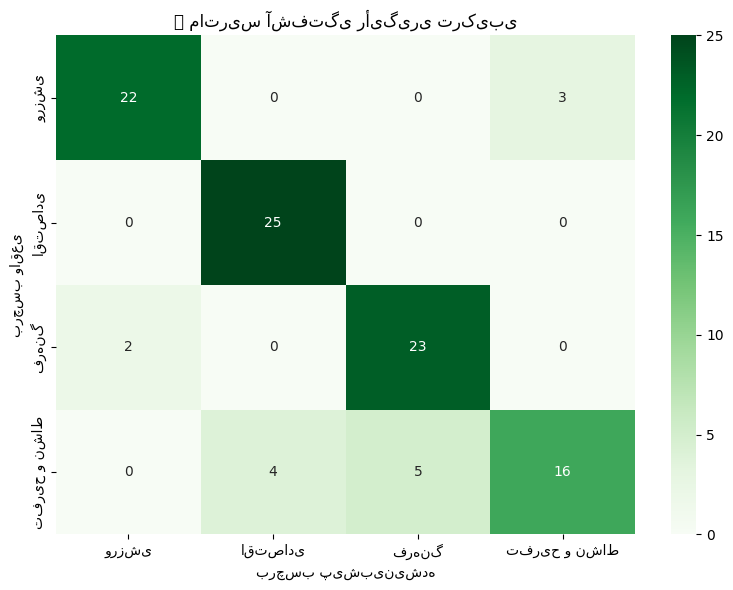

In [27]:
import json
import re
import torch
import numpy as np
from collections import Counter
from tqdm import tqdm
from langchain_community.llms import Ollama
from transformers import AutoTokenizer, AutoModelForSequenceClassification, set_seed
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==== تنظیمات ====
set_seed(42)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/final-bert-fa-lora/best_model"
JSON_PATH = "/content/drive/MyDrive/Farsi_Sports_Dataset/Final/voting_classifier_small.json"
LABELS = ["ورزشی", "اقتصادی", "فرهنگ", "تفریح و نشاط"]
LABEL2ID = {l: i for i, l in enumerate(LABELS)}
ID2LABEL = {i: l for l, i in LABEL2ID.items()}

# ==== مدل‌ها و توکنایزر ====
llm = Ollama(model="llama3.1")

tokenizer = AutoTokenizer.from_pretrained(MODEL_PATH)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_PATH).to(DEVICE)
model.eval()

# ==== پرامپت‌ها ====
zero_shot_prompt_template = """Please classify the following Farsi text into one of the given categories. Return only the label.
Text:
{text}

Categories: {labels}

Category:"""

few_shot_examples = [
    {"text": "تیم پرسپولیس با نتیجه ۲ بر ۱ استقلال را شکست داد.", "label": "ورزشی"},
    {"text": "نرخ دلار امروز کاهش یافت و سکه افزایش قیمت داشت.", "label": "اقتصادی"},
    {"text": "فیلم جدید اصغر فرهادی در جشنواره کن به نمایش درآمد.", "label": "فرهنگ"},
    {"text": "جشنواره موسیقی خیابانی با حضور هنرمندان جوان برگزار شد.", "label": "تفریح و نشاط"},
]

few_shot_examples_text = "\n\n".join(
    f"Text: {ex['text']}\nCategory (in Farsi): {ex['label']}" for ex in few_shot_examples
)

few_shot_prompt_template = """You are given a Farsi news article. Based on the examples and the list of possible categories, choose the correct category.
Respond ONLY with the exact category name in Farsi — no explanation.

Categories: {labels}

Examples:
{examples}

Text:
{text}

Category (in Farsi):"""

# ==== توابع کمکی ====
def normalize(text):
    text = re.sub(r"[«»:،.\s]+", " ", text).strip()
    for label in LABELS:
        if label in text:
            return label
    return text

def predict_zero(text):
    prompt = zero_shot_prompt_template.format(text=text, labels=", ".join(LABELS))
    return normalize(llm.invoke(prompt))

def predict_few(text):
    prompt = few_shot_prompt_template.format(
        text=text, labels=", ".join(LABELS), examples=few_shot_examples_text
    )
    return normalize(llm.invoke(prompt))

def predict_lora(texts):
    tokens = tokenizer(texts, padding=True, truncation=True, max_length=256, return_tensors="pt").to(DEVICE)
    with torch.no_grad():
        outputs = model(**tokens)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
    return [ID2LABEL[p] for p in preds], logits.cpu().numpy()

def vote_hard_weighted_priority(zero_label, few_label, lora_label, lora_logits, weight_lora=0.6):
    labels = [zero_label, few_label, lora_label]
    counts = Counter(labels)
    max_count = max(counts.values())
    top_labels = [label for label, cnt in counts.items() if cnt == max_count and label in LABELS]

    if len(top_labels) == 1:
        return top_labels[0]

    lora_probs = torch.softmax(torch.tensor(lora_logits), dim=0).numpy()

    score_dict = {label: 0 for label in top_labels}
    for label in top_labels:
        idx = LABEL2ID[label]
        score_dict[label] = lora_probs[idx] * weight_lora

    max_score = max(score_dict.values())
    candidates = [label for label, score in score_dict.items() if score == max_score]

    if lora_label in candidates:
        return lora_label
    return candidates[0]

# ==== بارگذاری داده ====
with open(JSON_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

texts = [item["text"] for item in data]
true_labels = [normalize(item["label"]) for item in data]

# ==== پیش‌بینی‌ها ====
print("در حال اجرای Zero-shot ...")
pred_zero = [predict_zero(t) for t in tqdm(texts)]

print("در حال اجرای Few-shot ...")
pred_few = [predict_few(t) for t in tqdm(texts)]

print("در حال اجرای LoRA ...")
pred_lora, lora_logits_batch = predict_lora(texts)

# ==== رأی‌گیری و ترکیب نهایی ====
final_preds = []

for i, (text, z, f, l, l_logits) in enumerate(zip(texts, pred_zero, pred_few, pred_lora, lora_logits_batch)):
    final_label = vote_hard_weighted_priority(z, f, l, l_logits, weight_lora=0.6)

    print(f"\n📄 نمونه {i+1}")
    print(f"📝 متن: {text[:100]}...")
    print(f"🔵 Zero-shot: {z}")
    print(f"🟢 Few-shot: {f}")
    print(f"🟣 LoRA Model: {l}")
    print(f"🏁 نتیجه نهایی: {final_label}")

    data[i]["pred_zero"] = z
    data[i]["pred_few"] = f
    data[i]["pred_lora"] = l
    data[i]["predicted_label"] = final_label
    final_preds.append(final_label)

# ==== ذخیره نتایج ====
with open(JSON_PATH, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

# ==== ارزیابی نهایی ====
print("\n📊 گزارش نهایی:")
print(classification_report(true_labels, final_preds, target_names=LABELS))
acc = accuracy_score(true_labels, final_preds)
print(f"🎯 دقت رأی‌گیری ترکیبی: {acc:.4f}")

# ==== ماتریس آشفتگی ====
cm = confusion_matrix(true_labels, final_preds, labels=LABELS)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=LABELS, yticklabels=LABELS, cmap="Greens")
plt.xlabel("برچسب پیش‌بینی‌شده")
plt.ylabel("برچسب واقعی")
plt.title("🧠 ماتریس آشفتگی رأی‌گیری ترکیبی")
plt.tight_layout()
plt.show()
